# Homework # 3 - K-Nearest Neighbor
Data file: social_network_ads.csv

### Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

### Load data

In [2]:
# Read CSV into dataframe
social_network_ads = pd.read_csv('data/social_network_ads.csv')

In [3]:
# Display first few rows
social_network_ads.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


### Drop unnecessary columns 'User ID' and 'Gender'

In [4]:
social_network_ads = social_network_ads.drop("User ID", axis = 1)
social_network_ads = social_network_ads.drop("Gender", axis = 1)
social_network_ads

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


### Explore data

#### Display a histogram with bins showing the distribution of the variable: Age

<AxesSubplot:xlabel='Age', ylabel='Count'>

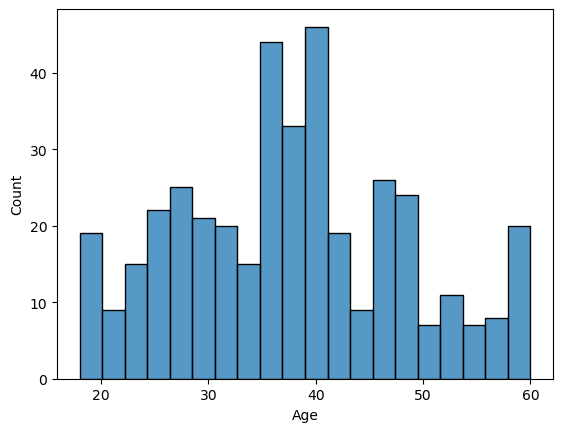

In [5]:
sns.histplot(data = social_network_ads, x= "Age", bins = 20)

#### Display a histogram with bins showing the distribution of the variable: EstimatedSalary

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Count'>

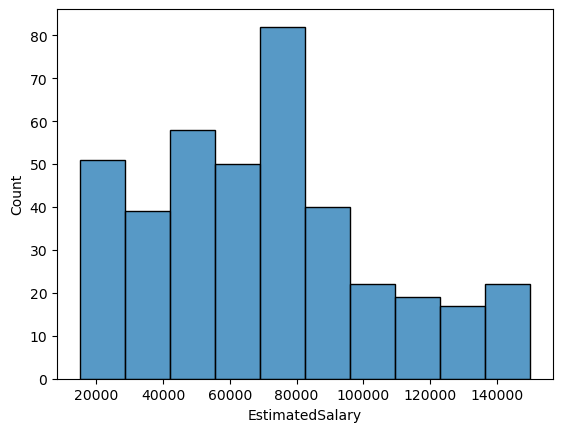

In [6]:
sns.histplot(data = social_network_ads, x= "EstimatedSalary", bins = 10)

#### Display min and max for variable: Age

In [7]:
MinAge = social_network_ads['Age'].min()
MaxAge = social_network_ads['Age'].max()
print(f"Minimum Age is {MinAge}")
print(f"Maximum Age is {MaxAge}")

Minimum Age is 18
Maximum Age is 60


#### Display min and max for variable: EstimatedSalary

In [8]:
MinEstimatedSalary = social_network_ads['EstimatedSalary'].min()
MaxEstimatedSalary = social_network_ads['EstimatedSalary'].max()
print(f"Minimum Estimated Salary is {MinEstimatedSalary}")
print(f"Maximum Estimated Salary is {MaxEstimatedSalary}")

Minimum Estimated Salary is 15000
Maximum Estimated Salary is 150000


#### Note that the scale for variable EstimatedSalary is much higher than for variable Age

### Separate independent and dependent variables
* Independent variables: All except Purchased
* Dependent variable: Purchased

In [9]:
X = social_network_ads.drop('Purchased', axis = 1)
y = social_network_ads['Purchased']

### Scale (standardize) variables: Age and EstimatedSalary

In [10]:
# Use StandardScaler
scaler = StandardScaler()

#### Display min and max for scaled variable: Age

In [11]:
scaler.fit(np.array(social_network_ads[['Age']]))
social_network_ads['Age'] = scaler.transform(np.array(social_network_ads[['Age']]))
MinAge = social_network_ads['Age'].min()
MaxAge = social_network_ads['Age'].max()
print(f"Minimum Age scaled value is {MinAge}")
print(f"Maximum Age scales value is {MaxAge}")

Minimum Age scaled value is -1.8773105578331641
Maximum Age scales value is 2.134240875847471


#### Display min and max for scaled variable: EstimatedSalary

In [12]:
scaler.fit(np.array(social_network_ads[['EstimatedSalary']]))
social_network_ads['EstimatedSalary'] = scaler.transform(np.array(social_network_ads[['EstimatedSalary']]))
MinEstimate = social_network_ads['EstimatedSalary'].min()
MaxEstimate = social_network_ads['EstimatedSalary'].max()
print(f"Minimum Estimated Salary scaled value is {MinEstimate}")
print(f"Maximum Estimated Salary scaled value is {MaxEstimate}")

Minimum Estimated Salary scaled value is -1.6075056615492507
Maximum Estimated Salary scaled value is 2.3567499772898386


### Split data into training and test sets

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Train KNeighborsClassifier (with default hyperparameters)

In [14]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

### Evaluate model performance

In [15]:
# Predict using the test set
y_pred=knn.predict(X_test)

C:\Users\khand\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [16]:
# Print model accuracy score on test set
print(f"Accuracy = {round((accuracy_score(y_test, y_pred) * 100), 2)}%")

Accuracy = 82.0%


In [17]:
# Generate classification report to evaluate the model
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.90      0.86        63
           1       0.81      0.68      0.74        37

    accuracy                           0.82       100
   macro avg       0.82      0.79      0.80       100
weighted avg       0.82      0.82      0.82       100



### Train KNeighborsClassifier (change n_neighbors hyperparameter and at least one other hyperparameter)

In [18]:
knn = KNeighborsClassifier(n_neighbors=6, weights='distance', metric="euclidean")
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=6, weights='distance')

### Evaluate model performance

In [19]:
# Predict using the test set
y_pred=knn.predict(X_test)

In [20]:
# Print model accuracy score on test set
print(f"Accuracy = {round((accuracy_score(y_test, y_pred) * 100), 2)}%")

Accuracy = 80.0%


In [21]:
# Generate classification report to evaluate the model
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.84      0.84      0.84        63
           1       0.73      0.73      0.73        37

    accuracy                           0.80       100
   macro avg       0.79      0.79      0.79       100
weighted avg       0.80      0.80      0.80       100

